# Finite Automata and Regular Expressions

<script async defer src="https://buttons.github.io/buttons.js"></script>
<a class="github-button" href="https://github.com/stratisMarkou/random-walks" data-color-scheme="no-preference: light; light: light; dark: dark;" data-icon="octicon-star" data-size="large" aria-label="Star stratisMarkou/random-walks on GitHub">Star</a>
<a class="github-button" href="https://github.com/stratisMarkou/random-walks/issues" data-color-scheme="no-preference: light; light: light; dark: dark;" data-icon="octicon-issue-opened" data-size="large" aria-label="Issue stratisMarkou/random-walks on GitHub">Issue</a>
<a class="github-button" href="https://github.com/stratisMarkou/random-walks/subscription" data-color-scheme="no-preference: light; light: light; dark: dark;" data-icon="octicon-eye" data-size="large" aria-label="Watch stratisMarkou/random-walks on GitHub">Watch</a>
<a class="github-button" href="https://github.com/stratisMarkou" data-color-scheme="no-preference: light; light: light; dark: dark;" data-size="large" aria-label="Follow @stratisMarkou on GitHub">Follow</a>

The course slowly builds up different models of computation of increasing complexity, starting with finite state automata (FSAs).
This chapter introduces FSAs and regular expressions, which turn out to be equivalent in terms of expressiveness.

## Finite State Automata

Finite state automata (FSAs) are an abstraction for a kind of machine with finite memory.
An FSA reads a sequence of symbol and either accepts or rejects it.
We begin by defining finite state automata (FSAs) formally.

:::{prf:definition} Finite State Automaton;  FSA
:label: finite-state-automaton

A finite state automaton $M$ is a 5-tuple $(Q, \Sigma, \delta, q_0, F)$ where

- $Q$ is a finite set, whose elements we call the _states_,
- $\Sigma$ is a finite set, whose elements we call the _alphabet symbols_,
- $\delta : Q \times \Sigma \to Q$ is a function called the transition function,
- $q_0 \in Q$ is the start state,
- $F \subseteq Q$ is a set of accept states.
:::

:::{note}
By its definition, at each state of the FSA there exists precisely one transition for each symbol in the alphabet.
Having two or more transitions with the same symbol is not allowed, and having no transition for a given symbol is also not allowed.
:::

In order to get a better idea for what an FSA does, we can draw it in the form of a state diagram.
In a state diagram, we use circles for the states, labeled arrows for the transitions, an arrow to mark the inital state, and double circles to mark the final states.
Below is an example of an FSA, with three states.

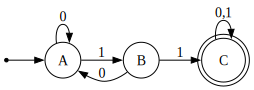

In [1]:
from automata.fa.dfa import DFA

A = "A"
B = "B"
C = "C"

dfa = DFA(
    states={A, B, C},
    input_symbols=(0, 1),
    transitions={
        A: {0: A, 1: B},
        B: {0: A, 1: C},
        C: {0: C, 1: C},
    },
    initial_state=A,
    final_states={C,},
)

dfa.show_diagram()

Now we define strings, which are sequences of symbols, and languages, which are sets of strings.

```{prf:definition} Strings and Languages

A string is a finite sequence of symbols from a finite set $\Sigma$.
A language is a (finite or infinite) set of strings.
The empty string $\epsilon$ is the string of length $0$.
The empty language $\emptyset$ is the set of no strings.
```

Now we can formally define what it means for an FSA to accept or reject a string, or to recognise a language.

```{prf:definition} FSA accepts a string / recognises a language

We say that the FSA $M = (Q, \Sigma, \delta, q_0, F)$ accepts the string $w = w_1 w_2\dots w_N$, where $w_n \in \Sigma$ for all $n = 1, \dots, N$, if there is a sequence of states $r_0, r_1, \dots, r_n \in Q$ such that

- $r_0 = q_0$,
- $r_n = \delta(r_{n-1}, r_n)$ for $1 \leq n \leq N$,
- $r_n \in F$.

We say that $M$ recognises the language $L$ if $M$ accepts exactly those strings in $L$.
We write $L(M)$ to denote the language recognised by $M$, that is $L(M)= \{w | M \text{ accepts } w\}$.
We say that $L(M)$ is the language of $M$.
```

Note that the definition above means that there exists an FSA which accepts all strings in the language and rejects all other strings which are not in the language.



```{prf:example}
The FSA $M$ shown above accepts all binary strings which contain $11$ as a substring.
```

Now we come to an important definition, that of regular languages.
We call a language regular if an FSA recognises it.


```{prf:definition} Regular language

We say that a language is regular if there exists an FSA that recognises it.
```

```{prf:example}
The set of all finite strings which have an even number of $1$s is a regular language.
An FSA that recognises this language is shown below.
```

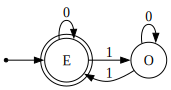

In [2]:
E = "E"
O = "O"

fsa = DFA(
    states={E, O},
    input_symbols=(0, 1),
    transitions={
        E: {0: E, 1: O},
        O: {0: O, 1: E},
    },
    initial_state=E,
    final_states={E,},
)

fsa.show_diagram()

::::{prf:example}
The set of all finite strings which have an equal number of $0$s and $1$ is not a regular language.


:::{dropdown} Proof

Let $A$ be the set of all finite strings with an equal number of $0$s and $1$.
We will show that $L$ is not a regular language by contradiction.
Suppose $A$ is a regular language.
Then there exists an FSA $M = (Q, \Sigma, \delta, q_0, F)$, which recognises it.
Since $Q$ is finite, it contains a finite number of states $S$.
Now, consider the set of strings $B = \{b_0, b_1, \dots, b_{S}\}$, where 

$$ b_s =  \underbrace{0 \dots 0}_{s ~\text{times}}~~\underbrace{1 \dots 1}_{S - s ~\text{times}}$$

Also, define the string $\bar{b}_s$ to be the string $b_s$ with the zeroes and ones swapped, that is

$$\bar{b}_s =  \underbrace{1 \dots 1}_{s ~\text{times}}~~\underbrace{0 \dots 0}_{S - s ~\text{times}}$$

Now, consider feeding each of the strings into $M.$
After reading all the symbols of a given string, $M$ will be in some state in $Q.$
Since there are $S$ states and $S+1$ strings, then by the [pigeonhole principle](https://en.wikipedia.org/wiki/Pigeonhole_principle), there will be two distinct strings, say $b_n$ and $b_m$, which end up in the same state.
Now note that $b_n \bar{b}_n$ contains an equal number of zeroes and ones, so $M$ accepts it.
Further, since $b_n$ and $b_m$ arrive at the same state, $b_m \bar{b}_n$ arrives at the same state as $b_n \bar{b}_n$, so it must be accepted.
But the number of ones minus the number of zeros in $b_n \bar{b}_m$ is $(S - 2n) - (S - 2m) = 2m - 2n$, and since $m \neq n$, it follows that $b_n \bar{b}_m$ does not contain an equal number of zeroes and ones, even though we established that it is accepted.
Contradiction.

This result can also be shown by using the Myhill-Nerode Theorem or the Regular Pumping Lemma.

:::

::::

As this result suggests, FSAs are very limited in terms of the languages they can recognise and, more generally, are a limited model of computation.

## Regular operations

Given existing languages, we can construct new ones.
In particular, we will define two binary operations, namely union and concatenation, and a unary operation, namely star, which create new languages from existing ones.
We give these operations the special name _regular operations_ because, as we will see later, they preserve the closure of regular languages.

:::{prf:definition} Regular operations

Let $A, B$ be languages.
We define the union, concatenation and star operations as:

- __Union__: $A \cup B = \{w | w \in A \text{ or } w \in B\}.$
- __Concatenation__: $A \circ B = AB = \{xy | x \in A \text{ and } y \in B\}.$
- __Star__: $A^* = \{x_1 \dots x_N | x_n \in A \text{ for } k \geq 0\}.$

Note that the language obtained via the star operation always contains the empty string.
:::

We can use these regular expressions to form new languages.
Regular expressions are a useful bit of notation that facilitates this.

:::{prf:definition} Regular expressions
:label: toc-def:regex

Let $\Sigma$ be an alphabet set.
A regular expression $R$ on $\Sigma$ is
1. $a$ for some $a \in \Sigma$,
2. $\epsilon$,
3. $\emptyset$,
4. $(R_1 \cup R_2)$, where $R_1$ and $R_2$ are regular expressions,
5. $(R_1 \circ R_2)$, where $R_1$ and $R_2$ are regular expressions,
6. $(R_1^*)$, where $R_1$ is a regular expression.
:::

:::{prf:example} Some regular expressions

Let $\Sigma = \{0, 1\}$.
The following are examples of regular expressions:

- $(0 \cup 1)^* = \Sigma^*$ is the set of all strings over $\Sigma$.
- $\Sigma^*1$ is the set of all strings that end in $1$.
- $\Sigma^*11\Sigma^*$ is the set of all strings that contain $11$.

When writing regular expressions, we may use the shorthand $a$ instead of the singleton set $\{a\}$, as was done in the examples above.
:::

## Closure properties: union

We continue with proving three closure properties of regular languages, namely closure under union, concatenation and star operations.
We will first prove closure under union.

:::{prf:theorem} Closure under union
:class: thm:reg-lang-union-closure-naive

If $A_1, A_2$ are regular languages over an alphabet $\Sigma$, so is $A_1 \cup A_2$.
:::

:::{dropdown} Proof: Closure under union

If $A_1$ and $A_2$ are regular languages, then there exist FSAs $M_1 = (Q_1, \Sigma, \delta_1, q_1, F_1)$ and $M_2 = (Q_2, \Sigma, \delta_2, q_2, F_2)$ which recognise them, respectively.
Define the FSA $M = (Q, \Sigma, \delta, q, F)$ as follows

- $Q = Q_1 \times Q_2$
- $q_0 = (q_1, q_2)$
- $\delta : Q \times \Sigma \to Q$ where $\delta((q, r), a) = (\delta_1(q, a), \delta_2(r, a))$
- $F = (F_1 \times Q_2) \cup (Q_1 \times F_2)$

Note that, from our definitions of $Q$, $q_0$ and $\delta$, running the FSA $M$ on a string $s$ is equivalent to running $M_1$ and $M_2$ on $s$ in parallel.
In addition, by our definition of $F$, $M$ accepts its input if either $M_1$ or $M_2$ accepts it.
Therefore $L(M) = L(M_1) \cup L(M_2) = A_1 \cup A_2$ is regular.
:::

It is more challenging to prove closure under concatenation and star in this way.
Instead, introducing a new concept, nondeterminism, will make these proofs much easier.
It will also simplify the proof for closure under union and make it more intuitive.
More generally, nondeterminism is a recurring theme across the theory of computation.

## Nondeterminism

We introduce the nondeterministic finite automaton (NFA), which extends the finite automata we have been looking at up to now, which we will refer to as deterministic finite automata (DFA).
Below is an example of an NFA which differs from DFAs in two important ways:

1. From each state in the NFA, there may be none, one or more outgoing transitions for each symbol.
2. There is an $\epsilon$ symbol which represents a transition that reads no symbol from the input, and just changes the state of the FSA.

The NFA accepts a string if there is any valid path from the initial state to some finite state.

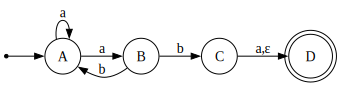

In [3]:
from automata.fa.nfa import NFA

A = "A"
B = "B"
C = "C"
D = "D"

a = "a"
b = "b"
e = ""

N1 = NFA(
    input_symbols={a, b},
    states={A, B, C, D},
    transitions={
        A: {a: {A, B},},
        B: {b: {A, C},},
        C: {a: D, e: D},
    },
    initial_state=A,
    final_states={D,},
)
N1.show_diagram()

We can also look at a few example input strings, and whether this NFA accepts or rejects them.

In [4]:
for string in ["ab", "aa", "aba", "abb", "aab"]:
    answer = 'accepts' if N1.accepts_input(string) else 'rejects'
    print(f"NFA {answer} input {string}")

NFA accepts input ab
NFA rejects input aa
NFA accepts input aba
NFA rejects input abb
NFA accepts input aab


Now we define NFAs formally.
The definition is the same as for DFAs except for the transition function $\delta$.

:::{margin}
Nondeterministic finite automata (NFAs) were introduced by Rabin and Scott in their 1959 paper [_Finite automata and their decision problems_](https://ieeexplore.ieee.org/document/5392601).
Since then, nondeterminism has become a key concept across Computer Science.
:::


:::{prf:definition} Nondeterministic Finite Automaton

A nondeterministic finite automaton (NFA) $N$ is a $5$-tuple $(Q, \Sigma, \delta, q_0, F)$ where

- $Q$ is a finite set of states,
- $\Sigma$ is a finite set of symbols,
- $\delta : Q \times \Sigma_{\epsilon} \to \mathcal{P}(Q) = \{R | R \subseteq Q\}$ is the transition function, where $\Sigma_{\epsilon} = \Sigma \cup \{\epsilon\}$,
- $q_0 \in Q$ is the initial state,
- $F \subseteq Q$ is a set of accept states.
:::

Even though NFAs appear to be more powerful than DFAs, they are in fact equivalent to them.
Every DFA is an NFA but perhaps more surprisingly every NFA has an equivalent DFA.

:::{prf:theorem} NFA recognises $A$ $\implies$ $A$ is regular
:label: toc-dfa-nfa-equivalence

If an NFA recognises $A$, then $A$ is regular, so there exists a DFA that recognises it.
:::

:::{dropdown} Proof

Suppose an NFA $M = (Q, \Sigma, \delta, q_0, F)$ recognises $A$.
We will define a DFA $M' = (Q', \Sigma, \delta', q_0', F')$ which recognises $A$.
Let

$$\begin{align}
Q' &= \mathcal{P}(Q) \\
q_0' &= \{q_0\} \\
F' &= \{R \in Q' | R \cap F \text{ is nonempty}\}
\end{align}$$

For the transition function, we need to consider the possibility of making transitions along $\epsilon$ arrows.
For $R \subseteq Q$, let $E(R)$ be the set of states that can be reached from $R$ using any number of $\epsilon$ transitions only, including $R$ itself.
Then we define the transition function as

$$\begin{align}
\delta'(R, a) &= \{q | q \in E(\delta(r, a)) \text{ for some } r \in R\}.
\end{align}$$

The resulting DFA $M' = (Q', \Sigma, \delta', q_0', F')$ accepts the same strings as $M$, so it recognises $A$, which is regular.
:::

We can use the procedure in this proof to convert any NFA, to an equivalent DFA.
For example, we can convert the NFA from the previous example into the following equivalent DFA.

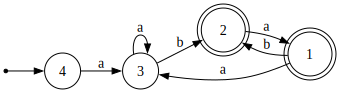

In [5]:
DFA.from_nfa(N1)

## Closure properties

We can now use nondeterminism to prove closure under union, intersection and star, much more easily.
The proof is based on the intuitive idea that we can make a larger NFA which is literally equivalent to running both machines in parallel.


:::{prf:theorem} Closure under union
:class: thm:reg-lang-union-closure

If $A_1, A_2$ are regular languages over an alphabet $\Sigma$, so is $A_1 \cup A_2$.
:::

:::{dropdown} Proof: Closure under union

If $A_1$ and $A_2$ are regular languages, then there exist DFAs $M_1 = (Q_1, \Sigma, \delta_1, q_1, F_1)$ and $M_2 = (Q_2, \Sigma, \delta_2, q_2, F_2)$ which recognise them, respectively.
Let us consider these DFAs to be NFAs (since any DFA can be viewed as an NFA).

Let the NFA $M = (Q, \Sigma, \delta, q, F)$ be defined as follows.
Let the initial state be $q = q_0$, the state space be $Q = Q_1 \cup Q_2$, the set of final states be $F = F_1 \cup F_2$ and the transition function be

$$ \delta(q, a) = \begin{cases}
\delta_1(q, a) & q \in Q_1 \\
\delta_2(q, a) & q \in Q_2 \\
q_1 & q = q_0, a = \epsilon \\
q_2 & q = q_0, a = \epsilon
\end{cases}$$

This NFA accepts exactly those strings in $A_1 \cup A_2$, so and since every {ref}`NFA has an equivalent DFA<toc-dfa-nfa-equivalence>`, there exists a DFA which recognises $A_1 \cup A_2$, so it is regular.
:::

Similarly, we can prove closure under concatenation, by joining two DFAs into a single larger NFA.

:::{prf:theorem} Closure under concatenation
:class: thm:reg-lang-concatenation-closure

If $A_1, A_2$ are regular languages over an alphabet $\Sigma$, so is $A_1 \circ A_2$.
:::

:::{dropdown} Proof: Closure under concatenation

If $A_1$ and $A_2$ are regular languages, then there exist DFAs $M_1 = (Q_1, \Sigma, \delta_1, q_1, F_1)$ and $M_2 = (Q_2, \Sigma, \delta_2, q_2, F_2)$ which recognise them, respectively.
Let us consider these DFAs to be NFAs (since any DFA can be viewed as an NFA).

Let the NFA $M = (Q, \Sigma, \delta, q, F)$ be defined as follows.
Let the initial state be $q = q_1$, the state space be $Q = Q_1 \cup Q_2$, the set of final states be $F = F_2$ and the transition function be

$$ \delta(q, a) = \begin{cases}
\delta_1(q, a) & q \in Q_1, q \not \in F_1 \\
\delta_1(q, a) & q \in Q_1, q \in F_1, a \neq \epsilon \\
\{q_2\} & q \in Q_1, q \in F_1, a = \epsilon \\
\delta_2(q, a) & q \in Q_2
\end{cases}$$

This NFA accepts exactly those strings in $A_1 \circ A_2$, so and since every {ref}`NFA has an equivalent DFA<toc-dfa-nfa-equivalence>`, there exists a DFA which recognises $A_1 \circ A_2$, so it is regular.
:::

Last, we can prove closure under the star operation by adding a new initial state, as well as $\epsilon$ transitions from the final states of the machine to the old initial state of the machine.

:::{prf:theorem} Closure under star
:class: thm:reg-lang-star-closure

If $A$ be a regular language.
Then so is $A^*$.
:::

:::{dropdown} Proof: Closure under star

If $A$ is a regular language, then there exists a DFA $M = (Q, \Sigma, \delta, q_0, F)$ which recognises it.

Let the NFA $M' = (Q', \Sigma, \delta, q_0', F')$ be defined as follows.
Let $q_0'$ be a new initial state, the state space be $Q' = Q \cup \{q_0'\}$, the set of final states be $F' = F \cup \{q_0\}$, and the transition function be

$$ \delta(q, a) = \begin{cases}
q_0 & q = q_0', a = \epsilon \\
\delta(q, a) & q \in Q, a \neq \epsilon \\
q_0 & q \in F, a = \epsilon
\end{cases}$$

This NFA accepts exactly those strings in $A^*$ and, since every {ref}`NFA has an equivalent DFA<toc-dfa-nfa-equivalence>`, there exists a DFA which recognises $A^*$, so it is regular.
:::

## Regular languages $\equiv$ Regular expressions

It turns out that NFAs are equivalent to regular expressions, in the sense that all regular expressions are regular languages and all regular languages can be written as regular expressions.
We break this result up in the two aforementioned parts.
The first part shows that the language written as a regular expression is regular.

:::{prf:lemma} Regular expressions yield regular languages

If $R$ is a regular expression and $A = L(R)$, then $A$ is a regular language
:::

:::{dropdown} Proof: Regular expressions yield regular languages

Suppose $R$ is a regular expression.
Then $R$ can be written as a finite composition of other regular expressions, following the {ref}`definition of regular expressions<toc-def:regex>`.
The languages represented by the atomic symbols $a \in \Sigma$, $\epsilon$ and $\emptyset$ can be recognised by the following NFAs:

__Language $\{a\}$:__
The language $\{a\}$ can be recognised by an NFA with a single initial state, a different final state and a single $a$ transition from the initial to the final state, so it is regular.

__Language $\{\epsilon\}$:__
The language $\{\epsilon\}$ can be recognised by an NFA with a single state, which is both the initial and the final state, so it is regular.

__Language $\emptyset$:__
The language $\emptyset$ can be recognised by an NFA with a single state, which is an initial state, and no final states, so it is regular.

__Regular expressions on languages:__
Then, since the class of regular languages is closed under the union, concatenation and star operations, applying these operations to the atomic languages above yields regular languages.
Applying these rules recursively shows that the language represented by any regular expression is a regular language, showing the result.
:::

The second part shows that if a language is regular, it can be written as a regular expression.
Before showing this result we introduce the notion of generalised finite automata, which will make use of in the proof.

:::{prf:definition} Generalised nondeterministic finite automaton

A generalised nondeterministic finite automaton (GNFA) is a $5$-tuple $(Q, \Sigma, \delta, q_s, q_a)$, where

- $Q$ is a finite set of states,
- $\Sigma$ is a finite set of symbols,
- $\delta : (Q - \{q_a\}) \times (Q - \{q_s\}) \to \mathcal{R}$ is the transition function, where $\mathcal{R}$ is the set of regular expressions over $\Sigma$,
- $q_s \in Q$ is the initial state,
- $q_a \in Q$ is the accept state.

We say that the GNFA accepts a string $w \in \Sigma^*$ if $w = w_1 \dots w_k$ and there exists a sequence of states $q_0, q_1, \dots, q_k$ exists, such that: $q_0 = q_s$ is the start state, $q_k = q_a$ is the accept state, and for each $i$ we have $i \in L(R_i)$, where $R_i = \delta(q_{i-1}, q_i)$.
:::


In order to show that a regular language can be written as a regular expression, the main idea is to start from a GNFA that is equivalent to a DFA that recognises the language, and incrementally remove states from this GNFA, while introducing transitions, appropriately annotated by regular expressions, to make up for the removed states.
This procedure is repeated until a single transition between two states is left in the GNFA.
The regular expression of this transition has the same language as the DFA we started with.


:::{prf:lemma} Regular languages can be written as regular expressions

If $A$ is a regular language, then there exists a regular expression $R$ such that $A = L(R)$.
:::


::::{dropdown} Proof: Regular languages can be written as regular expressions

Suppose $A$ is a regular language, so there exists a DFA, $M$, that recognises it.
We will describe a way to convert this DFA into an equivalent regular expression, as follows.
We will first convert the DFA into a GNFA.
Then we will repeatedly apply a procedure which yields an equivalent GNFA with one fewer state, until we obtain a GNFA with just two states: an accept state and a reject state, with a single arrow pointing from one to the other, labelled by a regular expression $R$ such that $A = L(R)$.

Suppose $M$ has $k$ states.
Then let $G_k$ be a GNFA with $k + 2$ states, where we have modified $M$ to have: a single initial state which points to the initial state of $M$ with an $\epsilon$ transition; a single accept state to which all accept states of $M$ point with $\epsilon$ transitions; additional $\emptyset$ transitions from every state to every other state which do not already have a labelled transition between them.
Let us define a procedure $\texttt{Convert}$ on a GNFA $G$ as follows.

:::{prf:algorithm} $\texttt{Convert}$

__Input:__
GNFA $G$ with $m$ states.

__Output:__
If $m > 2$, returns GNFA $G'$ with $m-1$ states.
Otherwise if $m = 2$, returns a regular expression $R$ that is equivalent to $G$.

1. If $m = 2$, then $G$ consists of a single initial state and a single accept state, with a single arrow connecting them, labelled by $R$.
Return $R$.
3. If $m > 2$, then select $q' \in Q - \{q_a, q_s\}$ and let $G' = (Q', \Sigma, \delta', q_s, q_a)$, where $Q' = Q - \{q'\}$.
Also define $\delta'(q_i, q_j) = R_1R_2^* R_3 \cup R_4,$ where $R_1 = \delta(q_i, q'), R_2 = \delta(q', q'), R_3 = \delta(q', q_j)$ and $R_4 = \delta(q_i, q_j)$, for each $q_i \in Q' - \{q_a\}$ and $q_j \in Q' - \{q_s\}$.
4. Compute and return $\texttt{Convert}(G')$.

:::

Applying $\texttt{Convert}$ to the GNFA $G_{k+2}$ is guaranteed to terminate, since the output at every step of the recursion has one fewer state.
In addition, at each step of the algorithm, each GNFA recognises the same language as the previous GNFA, so they all recognise the same language, by induction.
Therefore $A = L(M) = L(G) = L(\texttt{Convert}(G)) = L(R)$ as required.

::::


Putting the above lemmas, we obtain the result that regular languages are equivalent to regular expressions.

:::{prf:corollary} Regular laguages $\equiv$ regular expressions

A language is regular if and only if it can be written as a regular expression.
:::

## Regular pumping lemma

So far we have a few results that help show that a language is regular.
Now, we turn to a criterion that helps us show that a language is not regular, namely the regular pumping lemma.
This result effectively shows that the expressive power of DFAs and NFAs is limited, and that if such a machine recognises an infinite language, then the strings of the language have to have repetitions of a particular kind.

:::{prf:lemma} Regular Pumping Lemma
:label: toc-dfa-pumping-lemma

For any DFA $M$, there exists a positive integer $p$ such that for any string $s \in L(M)$, the following properties hold

1. $|y| \geq 1$,
2. $s = xyz$, where $|xy| \leq p$,
3. $s = xy^nz \in L(M)$ for all $n \geq 1$.

:::


:::{dropdown} Proof: Regular Pumping Lemma

Suppose $M$ is a DFA with $k$ states.
Let $p = k$.
If $M$ does not recognise any strings of length greater than or equal to $p$, the conditions of the lemma are satisfied vacuously.
Suppose $M$ recognses a string $s$ of length greater than or equal to $p$.
Then, when $M$ takes $s$ as input, it will enter a sequence $q_0q_1 \dots q_{|s|}$.
By the pigeonhole principle, at least one of these states is repeated, say

$$q_0q_1 \dots q_{|s|} = q_0q_1 \dots q_i \dots \underbrace{q_j}_{=~q_i} \dots q_{|s|}, $$

for some $i, j$.
Let $i$ be the smallest index such that $q_{j'} = q_i$ for some $j'$, and let $j > i$ be the smallest possible index such that $q_j = q_i$.
Let $x, y$ and $z$ be the substrings corresponding to the transitions $q_0 \dots q_i$, $q_i \dots q_j$ and $q_j \dots q_{|s|}$.
Then, the strings $xy^nz$ are in $M$ for every $n \geq 1$, since the sequences of states

$$q_0q_1 \dots (q_i \dots q_j)^n \dots q_{|s|}, $$

can all be reached by the DFA.
Because $i$ and $j$ are defined to be the indices correspondng to the earliest possible repetition it follows, again by the pigeonhole principle, that $|xy| \leq k = p$.
Because $j > i$ it follows that $|y| \geq 1$.
Put together, these properties prove the lemma.
:::

We can use the regular pumping lemma to show that certain languages are not regular, such as the example considered earlier.

::::{prf:example}

Let $A$ be the set of strings over $\{0, 1\}$ which contain an equal number of zeros and ones.
This language is not regular.


:::{dropdown} Proof

Let $A$ be defined as above.
If $A$ is regular, it has a pumping length $p$
Consider the string $s = 0^p 1^p \in A$.
By the regular pumping lemma, $s = xyz$ where $|xy| \leq p$.
Therefore $y$ is made up entirely of zeros.
Also by the pumping lemma, $s_n = xy^nz \in A$ for all $n \geq 1$.
But $s_n$ does not have an equal number of zeros and ones so it cannot be in $A,$ reaching a contradiction.
Therefore $A$ cannot be regular.
:::
::::